In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [41]:
#for me to keep track of how many classification articles I currently have
#to be removed later
df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
len(df_true)

52

In [51]:
df_true.iloc[3, :]

Tidsstempel                                                                                                                                                             29/09/2022 10.01.00
What is the article's index?                                                                                                                                                            268
Which year is the article from?                                                                                                                                                        2021
Is the article accurately labelled as classification?                                                                                                                                   Yes
If not accurately labelled as classification, what would you label it as?                                                                                        It was accurately labelled
Please input the quote from which you infer the answer to th

In [62]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word.lower()] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            option = option.lower()
            if option not in method_dic: #checks if it is a different answer           
                method_dic[option] = 1
                break #ensures that even if the other answer has a , in it, it is only counted once    
            else: 
                method_dic[option] = method_dic.get(option)+1
   
 #wanted to create a threshold, but not currently working
    for key in method_dic.keys(): #deleting the option if only one article uses it and count it as other instead
        final_dic = {}
        if method_dic.get(key) > 2:
            final_dic[key] = method_dic.get(key)
        else: 
            final_dic['other'] = method_dic.get('other')+1
        
        #maybe a niche case where other is never used? but probably not an issue
    return method_dic

In [7]:

word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'bag of features','multiple kernel learning','Other']


In [46]:

perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'mean', 'median', 'standard deviation', 'matthews correlation coefficient', 'Other']


In [16]:
def create_viz(df, word_list, column, plot_option, name, count_option, stacked_option):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    if count_option == 'multiple choice':
        data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}
        df = pd.DataFrame.from_dict(data)

    elif count_option == 'y/n':
        data = {'2012': count_yes_no(df_2012, column),
       '2021': count_yes_no(df_2021, column)}
        
        df = pd.DataFrame.from_dict(data)
        if name == 'Dataset type':
            row_names = {0:"Public", 1:"Private", 2:"Don't know"}
        else: row_names = {0:"Yes", 1:"No", 2:"Don't know"}
        
        df.rename(index= row_names, inplace=True)
  
   
        
    color_dic = {'2012': '#066570', '2021': '#5eb1bf'}
    
    if 'used' in name:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_xlabel('number of articles')
        plt.xticks(rotation = 0)
    else:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_ylabel('number of articles')
        plt.xticks(rotation = 45)
        
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')

    
    plt.savefig(name , bbox_inches='tight')
    
    
    return df


In [17]:
ethics_columns = [25, 27, 29, 31]

In [18]:
def count_yes_no(df, column):
    #creating a list of number of yes, no and don't know answers for a certain column in a df
    answer_list = [0,0,0] #[yes, no, don't know] [public, private, don't know]
    for input in df[df.columns[column]]:
        if input == 'Yes' or input == 'Public':
            answer_list[0] += 1
        elif input == 'No' or input == 'Private':
            answer_list[1] += 1
        else:
            answer_list[2] += 1
    return answer_list

In [19]:
def create_ethics_viz(df, columns, plot_option, name, year):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    if year == 2012:
        df = df_true[df_true['Which year is the article from?'] == 2012]
    else:
        df = df_true[df_true['Which year is the article from?'] == 2021]
    
       
    #counting the answers
    data = {column:[] for column in columns}
    for column in columns:
        data[column] = count_yes_no(df, column)
    df = pd.DataFrame(data) 
    
    #renaming columns and rows

    column_names = {columns[0]:'Respect for persons', columns[1]:'Benefience', columns[2]:'Justice', columns[3]:'Repect for law/public interest'}
  
    row_names = {0:"Yes", 1:"No", 2:"Don't know"}

    df.rename(index= row_names, columns = column_names, inplace=True)
    
    color_dic = {'Yes': '#066570', 'No': '#5eb1bf', "Don't know": 'grey'}
   

    fig = df.transpose().plot(kind = plot_option, title = name, stacked = True, color = color_dic)
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')
    fig.set_xlabel("number of articles")
    fig.legend( loc='lower center', ncol=3)
    plt.savefig(name , bbox_inches='tight')



    return df

,2012,2021
Yes,15,5
No,11,21
Don't know,0,0


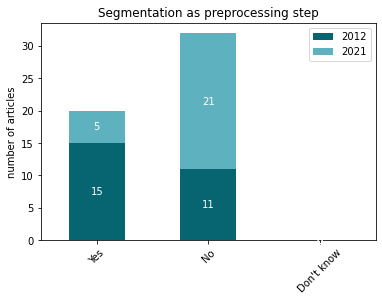

In [20]:
create_viz(df, [], 10, 'bar', 'Segmentation as preprocessing step', 'y/n', True)

,2012,2021
Public,6,16
Private,19,8
Don't know,1,2


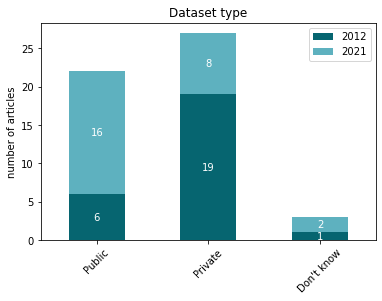

In [21]:
create_viz(df, [], 15, 'bar', 'Dataset type', 'y/n', True)

,2012,2021
Yes,13,21
No,13,5
Don't know,0,0


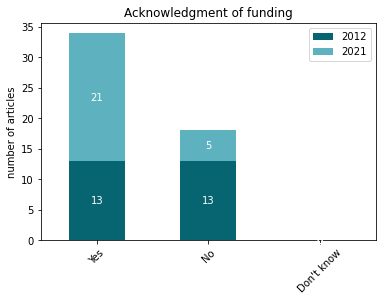

In [22]:
create_viz(df, [], 23, 'bar', 'Acknowledgment of funding', 'y/n', True)

,2012,2021
svm,11.0,0.0
graph analysis,4.0,3.0
supervised learning,0.0,1.0
unsupervised learning,2.0,1.0
transfer learning,0.0,1.0
neural network,1.0,22.0
other,0.0,0.0
linear dynamical system,1.0,NaN
multiple multi-variate random forest regression,1.0,NaN
conditional random fields,1.0,NaN


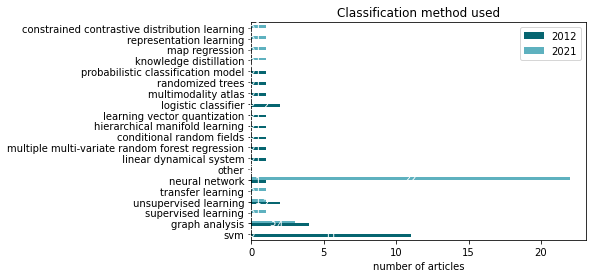

In [63]:
create_viz(df, word_list, 8, 'barh', 'Classification method used', 'multiple choice', False)

,2012,2021
auc,6.0,14.0
specificity,5.0,9.0
accuracy,19.0,13.0
recall,5.0,4.0
f1 score,2.0,8.0
sensitivity,7.0,10.0
mean,1.0,0.0
median,1.0,0.0
standard deviation,1.0,0.0
matthews correlation coefficient,0.0,1.0


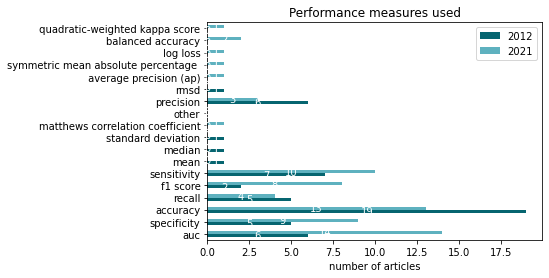

In [47]:
create_viz(df, perf_list, 9,'barh', 'Performance measures used', 'multiple choice', False)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,0,0,4
No,25,26,26,21
Don't know,0,0,0,1


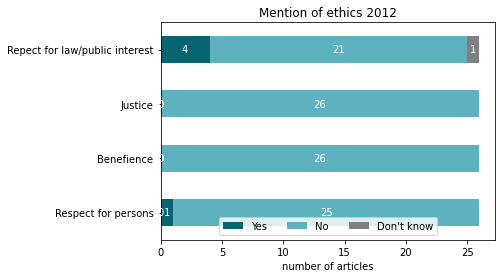

In [25]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2012', 2012)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,2,0,13
No,25,23,26,13
Don't know,0,1,0,0


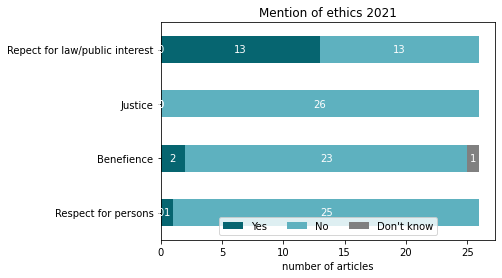

In [26]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2021', 2021)